# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [4]:
# Import the titanic dataset here

import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [5]:
# Code here

df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic_passenger = df_titanic[(df_titanic["type"] == 'passenger')]
df_titanic_passenger.head()

joint_dist = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'])

joint_dist.head()

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [6]:
# Conditional distribution of class given where they embarked
class_given_embarked = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'], normalize='columns')
class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [7]:
# Conditional distribution of embarked location given their class
embarked_given_class = pd.crosstab(df_titanic_passenger['class'], df_titanic_passenger['embarked'], normalize='index')
embarked_given_class


embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [8]:
# Proportion of 3rd class passengers embarked at Southampton
proportion_3rd_class_southampton = embarked_given_class.loc['3rd', 'S']
proportion_3rd_class_southampton

0.6967559943582511

In [9]:
# Proportion of Southampton passengers were in 3rd class?
proportion_southampton_3rd_class = class_given_embarked.loc['3rd', 'S']
proportion_southampton_3rd_class

0.5404814004376368

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


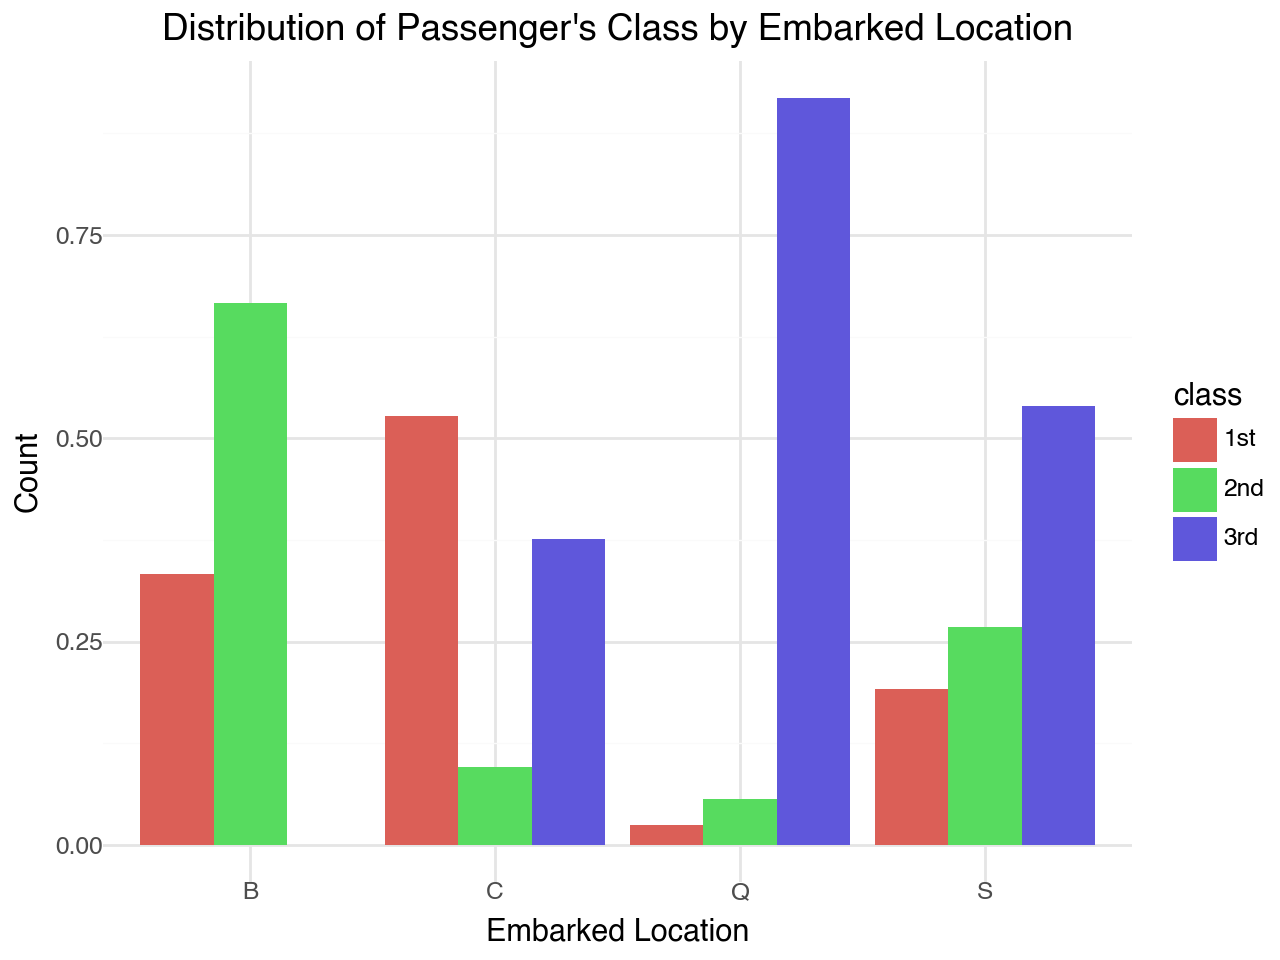

In [17]:
from plotnine import ggplot, aes, geom_bar, labs, theme, position_stack, stat_identity, theme_minimal, position_dodge


df_plot = class_given_embarked.reset_index().melt(id_vars='class', var_name='embarked', value_name='count')


# Create the plot with dodged bars
plot_dodge = (ggplot(df_plot, aes(x='embarked', y='count', fill='class'))
              + geom_bar(stat='identity', position=position_dodge())  # Bars side by side
              + labs(title="Distribution of Passenger's Class by Embarked Location", 
                     x="Embarked Location", 
                     y="Count")
              + theme_minimal()
             )



The dodged bar plot effectively visualizes the distribution of passenger classes across different embarkation points, making it easy to compare proportions side by side. It's useful for quickly spotting patterns, such as which embarkation point has more passengers in a particular class. However, the plot sacrifices precision, as it's harder to read exact proportions compared to the conditional distributions I calculated earlier. For answering specific, detailed questions like "What proportion of 3rd class passengers embarked at Southampton?" the conditional distribution table provides more accurate data. In summary, the plot is visually engaging and good for pattern recognition, while the calculations offer exact, numerical insights.